# **Introduction**

## **Profil**

Nama    : Intan Mukti Pebriana<br>
Batch   : HCK 019<br>
Objective   : Membuat model deep learning menggunakan Natural Language Processing (NLP) untuk memprediksi ulasan penggguna terhadap aplikasi Livin Mandiri mengenai rating.

---

## **Latar Belakang**

Livin' by Mandiri adalah aplikasi layanan keuangan digital yang diluncurkan oleh Bank Mandiri, salah satu bank terbesar di Indonesia. Aplikasi ini dirancang untuk memudahkan pengguna dalam mengakses berbagai layanan keuangan, seperti pembayaran, transfer uang, pembelian, hingga manajemen rekening langsung dari perangkat seluler. Dengan banyaknya fitur yang ditawarkan, Livin' by Mandiri diharapkan mampu meningkatkan kenyamanan dan efisiensi pengguna dalam melakukan transaksi keuangan sehari-hari.

Seiring dengan semakin meningkatnya adopsi aplikasi digital di kalangan masyarakat, ulasan pengguna di platform seperti Google Play dan App Store menjadi sangat penting. Ulasan ini tidak hanya membantu pengguna lain untuk memahami kelebihan dan kekurangan aplikasi, tetapi juga menjadi sumber informasi bagi developer aplikasi dalam memperbaiki dan mengembangkan fitur-fitur baru. Namun, jumlah ulasan yang sangat besar membuat analisis manual menjadi tidak efisien. Oleh karena itu, pendekatan otomatis melalui analisis Natural Language Processing (NLP) dapat digunakan untuk memahami pola dari ulasan pengguna.

Salah satu cara untuk memanfaatkan ulasan ini adalah dengan memprediksi rating aplikasi berdasarkan konten ulasan yang diberikan pengguna. Dengan memodelkan hubungan antara ulasan dan rating, tim developer dapat dengan cepat mengidentifikasi masalah potensial dan mengukur kepuasan pengguna secara lebih efisien.

## **Perumusan Masalah (SMART)**

1. **Spesifik (Specific)**: Membangun model NLP untuk memprediksi rating aplikasi Livin' by Mandiri berdasarkan teks ulasan pengguna.
2. **Terukur (Measurable)**: Menggunakan metrik accuracy untuk mengukur performa model, dengan target minimal 70%.
3. **Dapat Dicapai (Achievable)**: Menggunakan dataset ulasan pengguna, model akan dilatih dengan algoritma deep learning untuk mencapai target akurasi.
4. **Relevan (Relevant)**: Model prediksi rating akan membantu tim pengembang aplikasi dalam memahami kebutuhan pengguna dan memperbaiki kualitas aplikasi.
5. **Berjangka Waktu (Time-bound)**: Model ini diharapkan dapat selesai dalam 3 bulan.

**Perumusan masalah :** Membuat model NLP yang mampu memprediksi rating aplikasi Livin' by Mandiri berdasarkan ulasan pengguna dengan target akurasi minimal 70%. Model ini diharapkan dapat selesai dalam waktu 1 bulan dan membantu pengembang aplikasi meningkatkan kualitas berdasarkan hasil prediksi rating tersebut.

## **Penjabaran Masalah**

1. Bagaimana sebaran data ulasan pelanggan pada aplikasi Livin' by Mandiri berdasarkan kelas ratingnya ?
2. Apa saja kata-kata yang paling sering muncul berdasarkan masing-masing kelas ?


---

# **Import Libraries**

In [1]:
# Import Libraries
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape


from gensim.models import Word2Vec
from gensim.corpora import WikiCorpus
from gensim.models.word2vec import LineSentence

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score


nltk.download('stopwords')
nltk.download('punkt')
# !pip install pysastrawi
# !pip install tensorflow==2.15

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Periksa versi tensorflow
print(tf.__version__)

2.15.0


---

# **Data Loading**

Dataset ini berisi ulasan pengguna pada aplikasi Livin' by Mandiri. Livin' by Mandiri dirancang untuk menyediakan berbagai layanan dan fitur keuangan kepada pengguna, termasuk kemampuan untuk melakukan pembayaran, mentransfer uang, dan mengelola keuangan mereka di perangkat seluler. Livin' by Mandiri tersedia sebagai aplikasi seluler untuk perangkat Android dan iOS.

Berdasarkan creator Ghiffari Ahmadijaya, dataset reviews yang ada di Kaggle,
https://www.kaggle.com/datasets/itanium/livin-by-mandiri-app-reviews

Sumber dataset ini dikumpulkan dengan cara mengikis ulasan di Google Play Store Ide penggunaan EDA dan Analisis Sentimen.

Berikut adalah tabel markdown yang diminta:

| Nama Kolom | Deskripsi |
|------------|-----------|
| **date**   | Tanggal dan waktu ketika ulasan diberikan oleh pengguna. |
| **review** | Isi ulasan yang diberikan oleh pengguna tentang aplikasi Livin' by Mandiri. |
| **rating** | Penilaian atau rating yang diberikan oleh pengguna, biasanya dalam rentang 1 (buruk) hingga 5 (sangat baik). |
| **thumbs_up** | Jumlah orang yang menyukai (upvote) ulasan tersebut. |
| **version** | Versi aplikasi yang digunakan oleh pengguna ketika memberikan ulasan. |

In [3]:
# Data Loading
data = pd.read_csv('reviews.csv')
data

,date,review,rating,thumbs_up,version
0,2021-09-30 06:12:53,"Udah di coba, keren dan responsive, dengan tam...",5,36,1.0.0
1,2021-09-30 06:33:15,Excellent,5,0,1.0.0
2,2021-09-30 06:48:30,Keren. Cakep benar semakin canggih. Terdepan t...,5,22,1.0.0
3,2021-09-30 06:56:05,mantap,5,0,NaN
4,2021-09-30 07:02:21,Mantap,5,0,1.0.0
...,...,...,...,...,...
155187,2022-12-24 04:04:31,Mantap pokoke,5,0,NaN
155188,2022-12-24 04:05:17,Sejak di update livin saya susah dibuka. Setia...,1,0,1.2.0
155189,2022-12-24 04:13:18,"Kartu atm saya hilang,ini bagai mana cara gant...",4,0,1.2.0
155190,2022-12-24 04:17:13,Sudah di donwload tidak berhasil,1,0,NaN


### Kesimpulan Informasi Data yang Akan Digunakan untuk Model NLP

Data yang digunakan dalam proyek ini berisi ulasan pengguna aplikasi **Livin' by Mandiri**, yang mencakup informasi mengenai **tanggal ulasan**, **isi ulasan (review)**, **rating**, **jumlah likes (thumbs_up)**, dan **versi aplikasi**. Namun, untuk membangun model NLP dalam memprediksi **rating** aplikasi, hanya dua kolom yang akan dipakai, yaitu:

- **review**: Kolom ini berisi teks ulasan dari pengguna, yang mencerminkan persepsi, pengalaman, dan pendapat mereka mengenai aplikasi. Ulasan ini adalah input utama untuk model NLP, yang akan digunakan untuk memahami sentimen dan konteks ulasan.

- **rating**: Kolom ini memberikan penilaian kuantitatif dari pengguna mengenai pengalaman mereka dengan aplikasi, biasanya dalam skala 1 (buruk) hingga 5 (baik). Rating ini akan menjadi target atau label yang akan diprediksi oleh model.

**Alasan Pemilihan Kolom**
1. **Review** adalah satu-satunya fitur teks yang dapat diolah oleh model NLP untuk menganalisis sentimen atau emosi pengguna terhadap aplikasi. Kata-kata dan frasa dalam ulasan ini memberikan informasi penting tentang pengalaman pengguna.
   
2. **Rating** akan digunakan sebagai label atau target dalam model klasifikasi. Model akan dilatih untuk memprediksi rating berdasarkan ulasan teks.

Kolom lain seperti **thumbs_up**, **date** dan **version** tidak digunakan karena:
- **thumbs_up** hanya menunjukkan jumlah orang yang setuju dengan ulasan dan tidak secara langsung berhubungan dengan isi ulasan atau rating yang diberikan.
- **date**  Tanggal ulasan tidak memberikan kontribusi langsung pada konten ulasan atau rating, sehingga tidak relevan untuk prediksi NLP.
- **version** berfungsi lebih sebagai metadata dan tidak relevan secara langsung dengan tugas pemodelan prediksi rating berdasarkan teks ulasan.

Selanjutnya, membuat dataframe baru dari kolom review dan rating.

In [4]:
# Mengambil data review dan rating
df = data[["review","rating"]]
df

,review,rating
0,"Udah di coba, keren dan responsive, dengan tam...",5
1,Excellent,5
2,Keren. Cakep benar semakin canggih. Terdepan t...,5
3,mantap,5
4,Mantap,5
...,...,...
155187,Mantap pokoke,5
155188,Sejak di update livin saya susah dibuka. Setia...,1
155189,"Kartu atm saya hilang,ini bagai mana cara gant...",4
155190,Sudah di donwload tidak berhasil,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155192 entries, 0 to 155191
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  155192 non-null  object
 1   rating  155192 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Corpus/ dataset review diatas, memiliki document/ baris sebanyak 155.192 baris.

---

# **Feture Engineering**

Penyiapan document untuk proses pelatihan model NLP meliputi, splitting data, data balancing, text  preprocessing, dan target conversion.

## **Splitting Data**

Split document untuk train set, val set, test set, dan inference set

In [6]:
# Split data untuk fitur dan target
X = df.drop(columns='rating')  # untuk feature
y = df['rating']  # untuk target

# Pisahkan inference set terlebih dahulu dari total dataset
X_temp, X_inference, y_temp, y_inference = train_test_split(X,
                                                            y,
                                                            test_size=0.00006,  # Sebagian kecil data untuk inference
                                                            stratify=y,
                                                            random_state=11)

# Split data untuk train set dan test set dari data yang tersisa (X_temp dan y_temp)
X_train, X_test, y_train, y_test = train_test_split(X_temp,
                                                    y_temp,
                                                    test_size=0.05,  # 30% dari data yang tersisa untuk test
                                                    stratify=y_temp,
                                                    random_state=11)

# Split lagi train set untuk mendapatkan validation set
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.3,  # 20% dari data train untuk validation
                                                  stratify=y_train,
                                                  random_state=11)

# Cek ukuran dari setiap set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran X_val:", X_val.shape)
print("Ukuran X_inference:", X_inference.shape)

Ukuran X_train: (103195, 1)
Ukuran X_test: (7760, 1)
Ukuran X_val: (44227, 1)
Ukuran X_inference: (10, 1)


Setelah dilakukan splitting pada masing-masing set, periksa proposi pada masing-masing kelas target.

In [7]:
# Memeriksa proporsi target
print(y_train.value_counts())
print(y_test.value_counts())
print(y_val.value_counts())

rating
5    57329
1    26055
4     7282
3     6293
2     6236
Name: count, dtype: int64
rating
5    4311
1    1959
4     548
3     473
2     469
Name: count, dtype: int64
rating
5    24570
1    11167
4     3120
3     2697
2     2673
Name: count, dtype: int64


Terlihat dari output di atas, pada set train, val, dan set memiliki proporsi target yang imbalance pada setiap kelas. Oleh karena itu, agar model dapat belajar dengan baik, pada data train akan dilakukan balancing data. Pada data val dan test (opsional).

## **Data Balancing**

Data balancing yang digunakan untuk ulasan pelanggan pada aplikasi Livin' By Mandiri adalah dengan melakukan random under sampling. Karena ulasan pelanggan merupakan unstructured data, maka tidak dianjurkan balancing data menggunakan over sampling.

In [8]:
# Implementasi Random Under Sampler pada data train dan val
rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
X_val_resample, y_val_resample = rus.fit_resample(X_val, y_val)

In [9]:
# Memeriksa proporsi target
print(y_train_resample.value_counts())
print(y_val_resample.value_counts())
print(y_test.value_counts())

rating
1    6236
2    6236
3    6236
4    6236
5    6236
Name: count, dtype: int64
rating
1    2673
2    2673
3    2673
4    2673
5    2673
Name: count, dtype: int64
rating
5    4311
1    1959
4     548
3     473
2     469
Name: count, dtype: int64


Setelah dilakukan random under sampling pada data train dan val, masing-masing terlihat perubahannya menjadi 6236 dan 2673.

In [10]:
# Menambahkan data ke dalam list
data_list = [
    ('X_train_resample', X_train_resample),
    ('y_train_resample', y_train_resample),
    ('X_val_resample', X_val_resample),
    ('y_val_resample', y_val_resample),
    ('X_test', X_test),
    ('y_test', y_test)
]
# Loop untuk mereset indeks dan menampilkan hasil
for name, df in data_list:
    df_reset = df.reset_index(drop=True)
    print(f"\n{name} setelah reset index:")
    print(df_reset)


X_train_resample setelah reset index:
                                                  review
0      Tiap kali buka aplikasi pasti minta nomor kart...
1              Habis update malah jadi ga bisa login....
2      Bagus sih ,tpy klo mau buka apk ini selalu saj...
3         Sering eror aplikasinya, memori nya besar pula
4                                gunta ganti melulu cape
...                                                  ...
31175  Sy sangat kebantu bgt dgn adanya livin by mand...
31176                   Pokoknya top deh mandiri banking
31177                                             Mantap
31178                                             Mantap
31179                                               Nice

[31180 rows x 1 columns]

y_train_resample setelah reset index:
0        1
1        1
2        1
3        1
4        1
        ..
31175    5
31176    5
31177    5
31178    5
31179    5
Name: rating, Length: 31180, dtype: int64

X_val_resample setelah reset index:
            

## **Text Preprocessing**

Tahap text preprocessing bertujuan untuk memastikan bahwa data teks mentah siap digunakan oleh model. Proses ini meliputi, membersihkan dan mengubah teks menjadi representasi yang dapat diproses oleh model.

Selanjutnya, menambahkan stopwords untuk mengambil teks representative yaitu teks yang memiliki makna. Pemilihan stopwords disesuaikan dengan bahasa yang dipakai dari isi data yang dimiliki. Dari data ulasan pengguna dari negara indonesia, maka stopwords yang dipakai bahasa indonesia dari library nltk.

Bahasa Indonesia, memiliki banyak variasi kata yang terbentuk dari kata dasar yang diberi imbuhan dan awalan. Namun, komputer tidak akan mengerti konteksnya. Komputer akan menganggap setiap kata sebagai makna yang berbeda. Hal ini dapat menyebabkan ketidakefektifan dalam analisis dan pemrosesan teks, karena frekuensi kemunculan kata dasar yang sama akan tersebar ke banyak variasi kata. Oleh karena itu, pada tahap text preprocessing dilakukan stemming yang berfungsi menyederhanakan kata ke bentuk dasarnya, model akan lebih fokus pada arti sebenarnya dari teks, bukan pada variasi kata yang muncul. Hal ini dapat meningkatkan performa model NLP yang dilakukan.

Stemming yang dipakai pada tahap ini, menggunakan Sastrawi Stemmer untuk melakukan proses stemming, yaitu mengembalikan kata-kata berimbuhan atau kata turunan ke bentuk dasarnya. Sastrawi sangat berguna untuk Bahasa Indonesia karena dapat menangani banyak variasi imbuhan yang umum digunakan, seperti awalan, akhiran, sisipan, dan kombinasi berbagai imbuhan lainnya.

In [11]:
# Define Stopwords
from nltk.corpus import stopwords
stpwds_id = list(set(stopwords.words('indonesian')))
# stpwds_id.append('oh')
# Daftar kata yang ingin dicek
kata = ['livin', 'update', 'aplikasi', 'mandiri', 'transaksi', 'buka', 'biru', 'gunta', 'brp','hr','donlon',
        'kuning', 'bank', 'banget', 'bilang', 'tolong', 'knapa','skrg', 'bs', 'dmana', 'bgt', 'donlod','dg', 'taun',
        'mohon', 'kali', 'pakai', 'rekening', 'logo', 'kartu', 'coba', 'knp', 'lot', 'ko','app', 'wrn','pke',
        'pulsa', 'pake', 'suruh', 'daftar', 'kasih', 'bikin', 'lot', 'ganti', 'nih', 'deh','jg','tf','thn','nope',
        'lebih', 'lbh', 'jd', 'dgn', 'jk', 'depa', 'tampi','bdanya','admin','tmen','am','kryawan','bolak','hrs',
        'gimana', 'mulu', 'kalo', 'bintang', 'menu', 'hasil', 'pasword', 'download', 'trus', 'stlh','td','cm',
        'instal', 'uang', 'moga', 'habis', 'butuh', 'upgrade', 'data', 'dah', 'sdh', 'dr', 'msh', 'lg','hny',
        'dana', 'nomor', 'potong', 'langsung', 'shopee', 'tpy',  'klo', 'apk', 'sih', 'sy', 'by','skr','trs',
        'online', 'banking', 'sampe', 'gin', 'shopeepay', 'karna', 'kaya', 'biar', 'prnh','bla','sts', 'isteri',
        'moncer', 'donk', 'perban', 'ap', 'udh', 'tp', 'knpa', 'living', 'malam', 'pindah', 'diupdate', 'email',
        'gw', 'endap', 'ny', 'cman', 'rb', 'bln', 'skg', 'sbelumnya', 'ngsih', 'rgular', 'blan', 'risen', 'lho',
        'uninstal', 'pilih', 'yg', 'nya', 'ya', 'aja', 'udah','utk','atm','tntg','dn','hadeh','jmn','jrg','org','pnya']

# Tambahkan kata-kata tersebut ke dalam daftar stopwords
stpwds_id_add = stpwds_id + kata

# Define Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

Stopwords bahasa Indonesia yang  ada di library nltk merupakan kata-kata yang sering muncul dalam teks secara **general**. Namun tidak memiliki makna atau tidak relevan pada pemrosesan teks. Variabel kata adalah kumpulan dari 150 kata yang paling sering muncul setelah teks di-vectorize dan diidentifikasi dari dokumen yang memiliki token terbanyak. Kata-kata ini diambil karena dianggap tidak memiliki makna signifikan dalam proses pemodelan teks. Misalnya, kata-kata seperti "livin", "mandiri", "bank" sering muncul namun tidak membantu dalam menentukan rating ulasan.

Untuk memudhkan pemrosesan teks, tahap ini bisa dilakukan dengan membuat fungsinya dan disesuaikan dengan data yang dimiliki.

In [12]:
def text_preprocessing(text):
    # Mengubah teks menjadi huruf kecil (case folding)
    text = text.lower()

    # Kamus pengganti kata slang
    slang_dict = {
        # Kata yang terkait dengan "tidak"
        "ga": "tidak", "gak": "tidak", "gk": "tidak", "ngk": "tidak", "ngak": "tidak",
        "engak": "tidak", "engga": "tidak", "ngga": "tidak", "nggak": "tidak",
        "gx": "tidak", "enggak": "tidak", "tdk": "tidak", 'nggk': 'tidak',

        # Kata yang terkait dengan "upload"
        "uplod": "upload", "ngaplod": "upload", "aplod": "upload", "nguplod": "upload",

        # Kata yang terkait dengan "masalah"
        "mslh": "masalah"
    }

    # Mengganti kata slang menggunakan kamus yang sudah dibuat
    pattern = re.compile(r'\b(' + '|'.join(slang_dict.keys()) + r')\b')
    text = pattern.sub(lambda x: slang_dict[x.group()], text)

    # Menghapus kata yang diakhiri dengan 'x' (misal, akhirx -> akhir, biasax -> biasa)
    text = re.sub(r'x\b', '', text)

    # Menghapus kata yang dimulai dengan 'br' (misal, brulang -> ulang)
    text = re.sub(r'\bbr([a-z]+)', r'\1', text)

    # Menghapus karakter non-huruf (hanya menyimpan alfabet dan spasi)
    text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])

    # Menghapus spasi berlebihan (menjaga hanya satu spasi antar kata)
    text = ' '.join(text.split())

    # Menghapus huruf vokal yang berulang lebih dari 3 kali berturut-turut (misal, 'baguuus' -> 'bagus')
    text = re.sub(r'([aeiou])\1{2,}', r'\1', text)

    # Menghapus huruf konsonan yang berulang lebih dari sekali berturut-turut (misal, 'kerenn' -> 'keren')
    text = re.sub(r'([^aeiougrc])\1+', r'\1', text)

    # Tokenisasi (memecah teks menjadi kata-kata terpisah)
    tokens = word_tokenize(text)

    # Menghapus kata yang hanya terdiri dari 1 karakter
    tokens = [word for word in tokens if len(word) > 1]

    # Menghapus stopwords (dengan asumsi 'stpwds_id_add' sudah didefinisikan sebelumnya)
    tokens = [word for word in tokens if word not in stpwds_id_add]

    # Proses stemming (dengan asumsi 'stemmer' sudah didefinisikan sebelumnya)
    tokens = [stemmer.stem(word) for word in tokens]

    # Menggabungkan kembali token menjadi satu string
    text = ' '.join(tokens)

    return text


Fungsi text preprocessing di atas terdiri dari :
1. **Mengubah huruf menjadi kecil (case folding):** Semua teks diubah menjadi huruf kecil untuk konsistensi dalam analisis teks.
2. **Penggantian kata slang:** Kata-kata slang seperti "ga", "uplod", dan "mslh" diganti dengan kata formalnya seperti "tidak", "upload", dan "masalah".
3. **Penghapusan akhiran 'x':** Menghapus huruf 'x' di akhir kata yang umumnya merupakan bentuk informal.
4. **Penghapusan awalan 'br':** Kata yang diawali dengan 'br' diubah ke bentuk dasarnya.
5. **Penghapusan karakter non-alfabet:** Hanya alfabet dan spasi yang dipertahankan, karakter lain dihapus.
6. **Menghilangkan spasi berlebihan:** Menjaga agar tidak ada spasi berlebih antara kata-kata.
7. **Penghapusan huruf vokal dan konsonan berulang:** Menghilangkan pengulangan vokal lebih dari tiga kali dan pengulangan konsonan lebih dari sekali.
8. **Tokenisasi:** Memecah teks menjadi kata-kata individu.
9. **Penghapusan kata berkarakter tunggal:** Menghapus kata yang hanya terdiri dari satu karakter.
10. **Penghapusan stopwords:** Menghapus kata-kata umum yang tidak relevan untuk analisis.
11. **Stemming:** Mengubah kata ke bentuk dasar menggunakan stemmer.


In [14]:
# Menerapkan fungsi text_preprocessing ke kolom 'text' pada data train
X_train_resample['text_processed'] = X_train_resample['review'].apply(text_preprocessing)
X_val_resample['text_processed'] = X_val_resample['review'].apply(text_preprocessing)
X_test['text_processed'] = X_test['review'].apply(text_preprocessing)

# Menampilkan DataFrame setelah kolom baru ditambahkan
X_val_resample.head()


,review,text_processed
80609,Kenapa gabisa di buka? Harus periksa pengatura...,gabisa periksa atur jam otomatis otomatis sblm...
49488,Tambah JELEKKKKK SERING GANGGUAN....,jelek ganggu
134031,"boros baterai, masa setiap hari app ini makai ...",boros baterai maka daya baterai gede main game...
41815,Lemot sering error koneksi ke internet nya pdh...,lot error koneksi internet pdhl internet error...
116937,Knpa sih harus di perbarui trus padahal baru d...,baru susah perbaruiinya


Setelah melakukan text preprocessing, terdapat perubahan dari data asli, seperti:
- Kata yang memiliki upper case dan kapital sudah menjadi lower case.
- Kata-kata dengan huruf berulang seperti "JELEKKKKK" menjadi "jelek" setelah penghapusan karakter berulang.
- Karakter non-huruf seperti tanda baca (?) dan (,) terhapus.
- Kata yang berimbuhan "gangguan" menjadi "ganggu".

In [15]:
# Menagambil data setelah text preprocessing
X_train_clean = X_train_resample['text_processed']
X_val_clean = X_val_resample['text_processed']
X_test_clean = X_test['text_processed']
X_train_clean

,text_processed
37265,kirain pas cek kacau
25470,login
148803,bagus muak
55952,eror aplikasi memori
113113,melulu cape
...,...
106363,bantu mudah transfer byr tagih makasih
112874,pokok top
95615,mantap
98877,mantap


Untuk training model NLP, data yang dipakai adalah data yang sudah dilakukan text processing.

Saat melakukan text processing, terdapat penghapusan kata yang tidak bermakna menggunakan stopwords. Apabila suatu document hanya memiliki kata yang tidak bermakna, maka setelah text processing document tersebut kosong/ tidak memiliki satu kata apapun. Oleh karena itu perlu dilakukan pemeriksaan terhadap document yang bernilai kosong, agar tidak dapat dimasukkan dalam training model.

In [17]:
def analyze_whitespace_rows(df):
    """
    Menghitung dan menampilkan informasi tentang baris yang hanya berisi whitespace
    dalam kolom tertentu dari DataFrame."""

    # Menghitung banyaknya baris yang hanya berisi whitespace
    whitespace_rows = df.str.strip() == ''

    # Menjumlahkan total baris yang hanya berisi whitespace
    total_whitespace_rows = whitespace_rows.sum()

    # Mengakses indeks dari baris yang hanya berisi whitespace
    indices_of_whitespace_rows = whitespace_rows[whitespace_rows].index.tolist()

    # Menampilkan hasil
    # print(f"Banyaknya baris yang hanya berisi whitespace: {total_whitespace_rows}")
    # print(f"Indeks baris yang hanya berisi whitespace: {indices_of_whitespace_rows}")

    return total_whitespace_rows, indices_of_whitespace_rows


In [18]:
# Daftar Series dan nama mereka
series_list = [
    ('X_train_clean', X_train_clean),
    ('X_val_clean', X_val_clean),
    ('X_test_clean', X_test_clean)
]

# Loop untuk menganalisis dan menampilkan hasil
for name, series in series_list:
    total_whitespace_rows, indices_of_whitespace_rows = analyze_whitespace_rows(series)
    print(f"Analisis untuk {name}:")
    print(f"Banyaknya baris yang hanya berisi whitespace: {total_whitespace_rows}")
    print(f"Indeks baris yang hanya berisi whitespace: {indices_of_whitespace_rows}\n")

Analisis untuk X_train_clean:
Banyaknya baris yang hanya berisi whitespace: 1466
Indeks baris yang hanya berisi whitespace: [112331, 154668, 23619, 150365, 60845, 153781, 152296, 19821, 56379, 129202, 110838, 124815, 145323, 33586, 147241, 145791, 57279, 73355, 39384, 19585, 147623, 54527, 93002, 25503, 55901, 63900, 137236, 6616, 132429, 129549, 55695, 131125, 12763, 137131, 113412, 64154, 147251, 123458, 47758, 30388, 12086, 54446, 90839, 64256, 8351, 116379, 24198, 68044, 31654, 92596, 144235, 32119, 132052, 138643, 144394, 42852, 146387, 37533, 56994, 54813, 51204, 73841, 142858, 37030, 37615, 42476, 116703, 113786, 28445, 122343, 117909, 117400, 58219, 61417, 62528, 66429, 45837, 128905, 50901, 69680, 49207, 113149, 52406, 149891, 142088, 53734, 48696, 90969, 134997, 81849, 116914, 136084, 43214, 36569, 45514, 53335, 34903, 46232, 124214, 7140, 35130, 93287, 154432, 147750, 111833, 8799, 11988, 7346, 119068, 46120, 144426, 111683, 115528, 144865, 55152, 23235, 116411, 154797, 1541

Setelah dilakukan text processing, output di atas menunjukkan bahwa terdapat document kosong pada data train, val, dan test. Baris-baris ini kemungkinan besar tidak memberikan informasi yang berarti.Oleh karena itu, baris yang hanya berisi whitespace perlu dihapus dari dataset untuk menghindari performa model yang menjadi kurang baik.

Selain membersihkan data dari input (X), perlu dipastikan data target (y) sinkron dengan data input. Jika ada baris yang dihapus di X, pastikan data target pada indeks yang sama juga dihapus untuk menjaga konsistensi.

In [19]:
# Mendapatkan indeks baris yang hanya berisi whitespace
indices_of_whitespace = X_train_clean[X_train_clean.str.strip() == ''].index.tolist()

# Menghapus baris yang sesuai dari y_train_resample berdasarkan indeks
y_train_resample = y_train_resample.drop(indices_of_whitespace)

# Menghapus baris yang hanya berisi whitespace dari X_train_clean
X_train_clean = X_train_clean[X_train_clean.str.strip() != '']

# Mereset indeks
X_train_clean = X_train_clean.reset_index(drop=True)
y_train_resample = y_train_resample.reset_index(drop=True)

In [20]:
# Mendapatkan indeks baris yang hanya berisi whitespace
indices_of_whitespace_rows = X_val_clean[X_val_clean.str.strip() == ''].index.tolist()

# Menghapus baris yang sesuai dari y_val_resample berdasarkan indeks
y_val_resample = y_val_resample.drop(indices_of_whitespace_rows)

# Menghapus baris yang hanya berisi whitespace dari X_val_clean
X_val_clean = X_val_clean[X_val_clean.str.strip() != '']

# Mereset indeks
X_val_clean = X_val_clean.reset_index(drop=True)
y_val_resample = y_val_resample.reset_index(drop=True)

In [21]:
# Mendapatkan indeks baris yang hanya berisi whitespace
indices_of_whitespace_rows = X_test_clean[X_test_clean.str.strip() == ''].index.tolist()

# Menghapus baris yang sesuai dari y_test berdasarkan indeks
y_test = y_test.drop(indices_of_whitespace_rows)

# Menghapus baris yang hanya berisi whitespace dari X_test_clean
X_test_clean = X_test_clean[X_test_clean.str.strip() != '']

# Mereset indeks
X_test_clean = X_test_clean.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [22]:
print(X_train_clean,y_train_resample)
print(X_val_clean,y_val_resample)
print(X_test_clean,y_test)

0                          kirain pas cek kacau
1                                         login
2                                    bagus muak
3                          eror aplikasi memori
4                                   melulu cape
                          ...                  
29709    bantu mudah transfer byr tagih makasih
29710                                 pokok top
29711                                    mantap
29712                                    mantap
29713                                      nice
Name: text_processed, Length: 29714, dtype: object 0        1
1        1
2        1
3        1
4        1
        ..
29709    5
29710    5
29711    5
29712    5
29713    5
Name: rating, Length: 29714, dtype: int64
0        gabisa periksa atur jam otomatis otomatis sblm...
1                                             jelek ganggu
2        boros baterai maka daya baterai gede main game...
3        lot error koneksi internet pdhl internet error...
4                     

Dari output di atas, masing-masing data sudah berubah.
1. Data train menjadi 29.714
2. Data val menjadi 12.753
3. Data test menjadi 7.385

In [23]:
# Daftar Series dan nama mereka
series_list = [
    ('X_train_clean', X_train_clean),
    ('X_val_clean', X_val_clean),
    ('X_test_clean', X_test_clean)
]

# Loop untuk menganalisis dan menampilkan hasil
for name, series in series_list:
    total_whitespace_rows, indices_of_whitespace_rows = analyze_whitespace_rows(series)
    print(f"Analisis untuk {name}:")
    print(f"Banyaknya baris yang hanya berisi whitespace: {total_whitespace_rows}")
    print(f"Indeks baris yang hanya berisi whitespace: {indices_of_whitespace_rows}\n")

Analisis untuk X_train_clean:
Banyaknya baris yang hanya berisi whitespace: 0
Indeks baris yang hanya berisi whitespace: []

Analisis untuk X_val_clean:
Banyaknya baris yang hanya berisi whitespace: 0
Indeks baris yang hanya berisi whitespace: []

Analisis untuk X_test_clean:
Banyaknya baris yang hanya berisi whitespace: 0
Indeks baris yang hanya berisi whitespace: []



Hasil setelah melakukan pembersihan whitespace pada data train, val dan test, sekarang sudah 0 / tidak ada.

## **Target Conversion**

 Pada tahap ini, target conversion melalui proses encoding dilakukan untuk mengubah label target (kelas) menjadi bentuk yang dapat diproses oleh model, terutama dalam kasus klasifikasi.

In [24]:
# Menampilkan kelas target
print(y_train_resample.unique())
print(y_val_resample.unique())
print(y_test.unique())

[1 2 3 4 5]
[1 2 3 4 5]
[2 1 5 4 3]


Dalam klasifikasi dengan lebih dari dua kelas, model memerlukan label target dalam bentuk yang lebih mudah diproses. One-hot encoding memungkinkan model untuk memprediksi probabilitas dari setiap kelas.

Jika label target dibiarkan dalam bentuk integer, model mungkin secara keliru menganggap bahwa label 2 lebih besar dari label 1, yang tidak sesuai untuk masalah klasifikasi kategori. One-hot encoding menghilangkan hubungan ordinal ini.

Banyak loss function yang digunakan untuk klasifikasi multi-kelas, seperti categorical cross-entropy, membutuhkan label target dalam bentuk one-hot encoded agar dapat menghitung kesalahan prediksi secara benar.

In [25]:
# Melakukan labeling data taget yang dimulai dari 0
y_train_label = y_train_resample.replace({1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4})
y_val_label = y_val_resample.replace({1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4})
y_test_label = y_test.replace({1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4})
y_test_label

,rating
0,1
1,0
2,4
3,0
4,3
...,...
7380,4
7381,4
7382,4
7383,1


Fungsi to_categorical dari TensorFlow digunakan untuk mengubah label numerik menjadi one-hot encoding. One-hot encoding mengubah label target menjadi vektor biner, di mana setiap vektor memiliki nilai 1 pada indeks yang mewakili kelas sebenarnya, dan 0 di tempat lain.

In [26]:
# Melakukan encoding pada data target
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train_label)
y_val_ohe = to_categorical(y_val_label)
y_test_ohe = to_categorical(y_test_label)
y_train_ohe

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

Dari output di atas, data yang ditampilkan dari data train yang sudah di encoding. Contoh : pada document pertama data train, memiliki label 0 dengan rating 1.

# **Exploratory Data Analysis**

Melakukan visualisasi berdasarkan kelas target.

## **Wordcloud**

Wordcloud merupakan alat visualisasi yang digunakan untuk menampilkan kata-kata yang paling sering muncul dalam suatu teks. Semakin sering sebuah kata muncul, semakin besar ukuran kata tersebut dalam visualisasi. Hal ini berguna untuk mendapatkan gambaran cepat mengenai tema atau topik utama dari sekumpulan teks.

In [27]:
# Import library yang dibutuhkan
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat WordCloud berdasarkan rating dalam Series
def plot_wordcloud_by_rating(series_text, series_rating):
    unique_ratings = series_rating.unique()  # Mendapatkan rating yang unik
    fig, ax = plt.subplots(len(unique_ratings), 1, figsize=(12, len(unique_ratings) * 6))

    # Looping untuk setiap rating
    for i, rating in enumerate(unique_ratings):
        # Gabungkan semua teks untuk rating tertentu
        text = " ".join(series_text[series_rating == rating])
        wordcloud = WordCloud(width=500, height=250, background_color='white', colormap='viridis').generate(text)

        # Plotting
        ax[i].imshow(wordcloud, interpolation='bilinear')
        ax[i].set_title(f'WordCloud Rating {rating}', fontsize=16)
        ax[i].axis('off')  # Menghilangkan sumbu axis

    plt.tight_layout()
    plt.show()



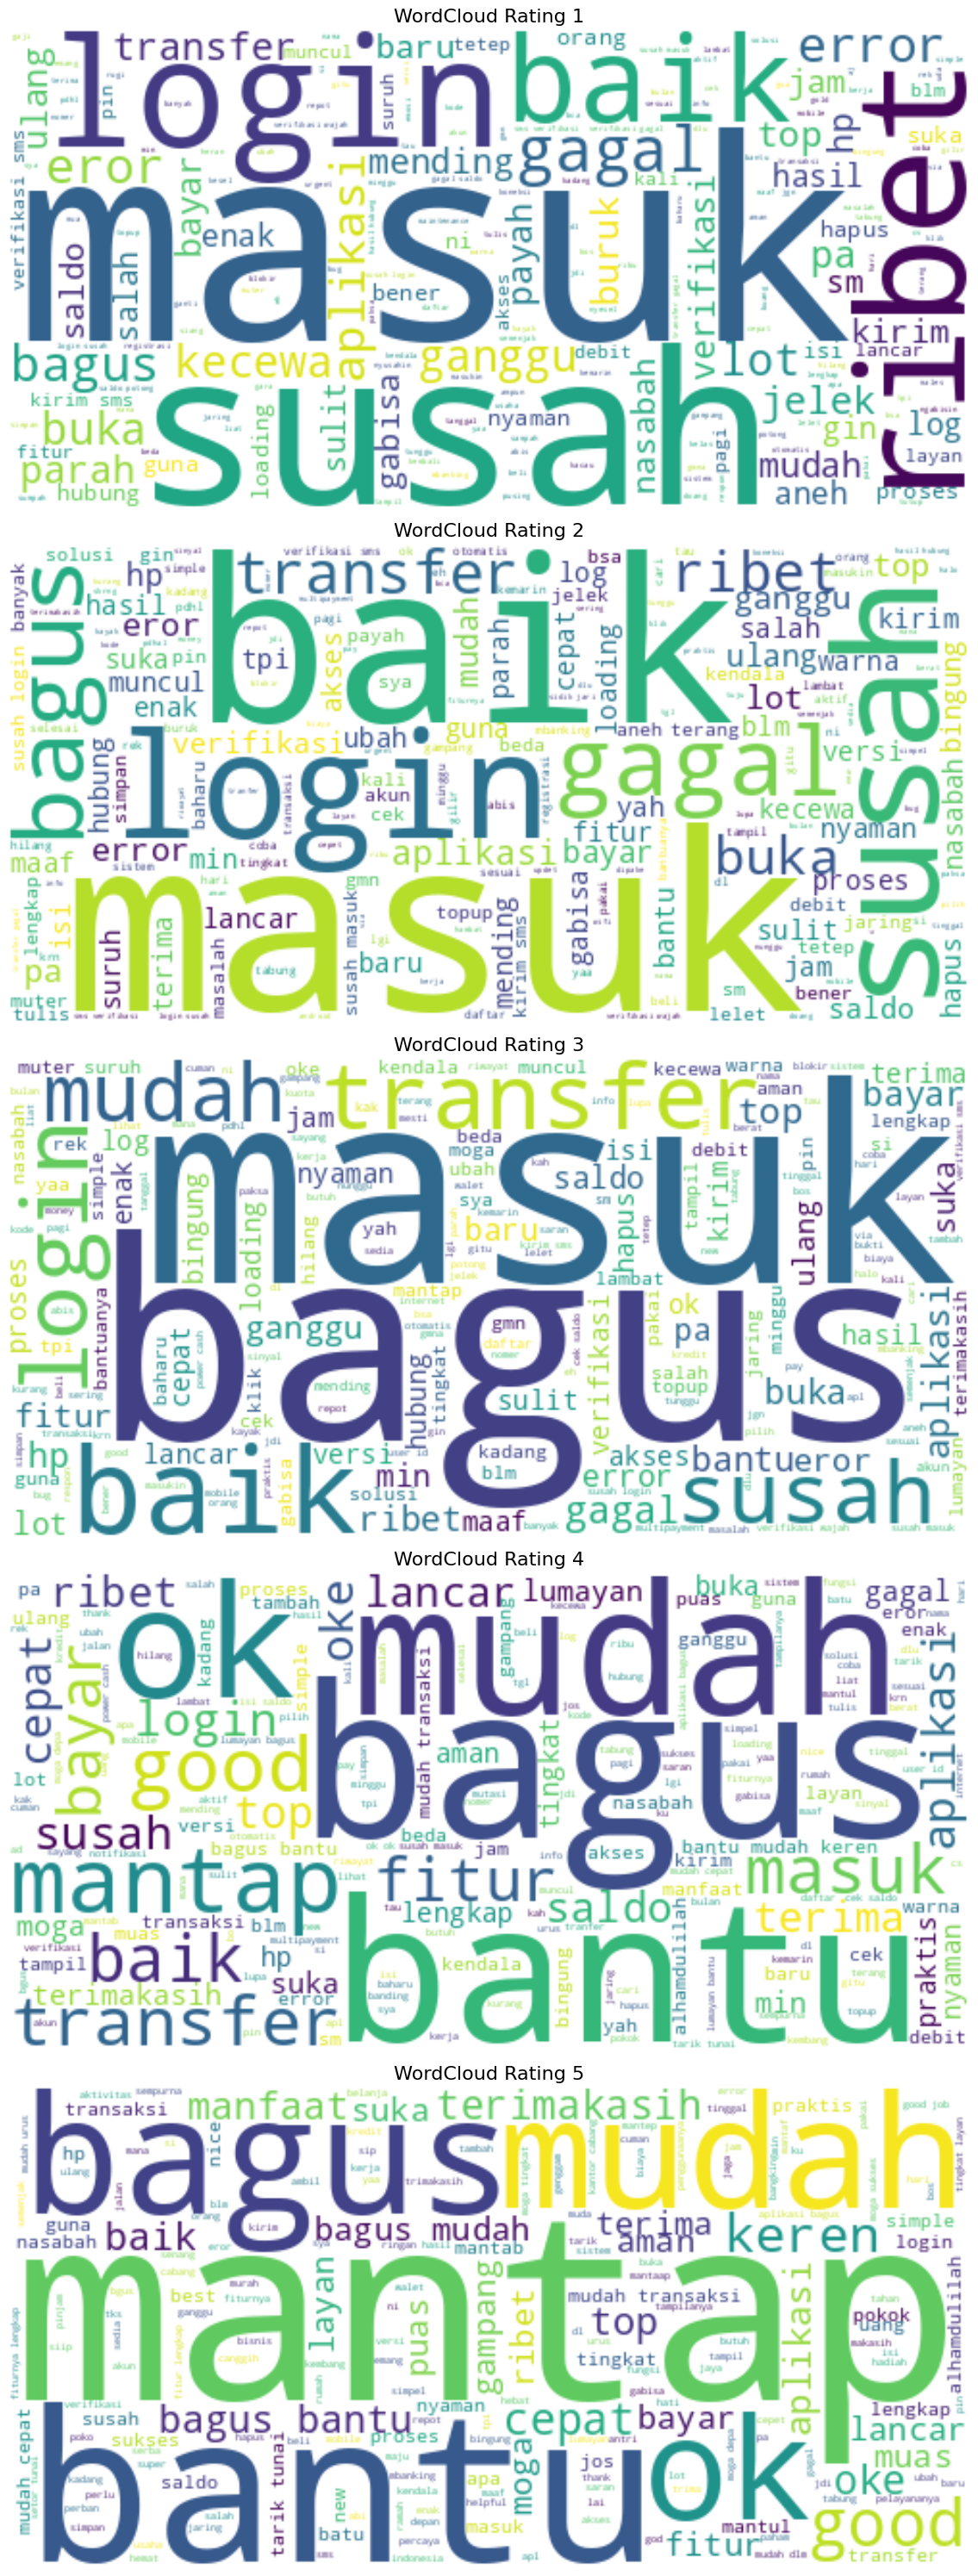

In [28]:
# Memanggil fungsi untuk menampilkan WordCloud berdasarkan masing-masing rating
plot_wordcloud_by_rating(X_train_clean, y_train_resample)

Dari visualisasi Wordcloud di atas,  kata-kata yang paling sering muncul dalam ulasan atau teks yang dikategorikan berdasarkan rating adalah :
- Rating 1-2: Kata-kata seperti "masuk", "susah", "gagal", dan "login" mendominasi, yang menunjukkan ulasan yang lebih negatif. Pengguna sering mengeluhkan masalah dengan "masuk" (login), "error", "gagal", dan proses yang "susah".
- Rating 3: Masih terlihat adanya masalah dengan "masuk", tetapi beberapa kata positif seperti "baik" dan "bagus" mulai muncul, yang menandakan bahwa pengalaman pengguna mulai membaik, meskipun ada beberapa masalah.
- Rating 4: Kata-kata positif seperti "bagus", "baik", "fitur", dan "lancar" menjadi lebih dominan. Ini menunjukkan bahwa pengguna memberikan ulasan yang lebih baik dan cenderung merasa puas dengan aplikasinya.
- Rating 5: Kata-kata yang paling dominan adalah "mantap", "bagus", "mudah", dan "ok", yang menggambarkan ulasan yang sangat positif. Pengguna memberikan apresiasi terhadap kemudahan penggunaan aplikasi dan fungsionalitas yang memuaskan.

## **Pie Chart**

Melihat visualisasi distribusi rating 1-5 menggunakan pie chart.

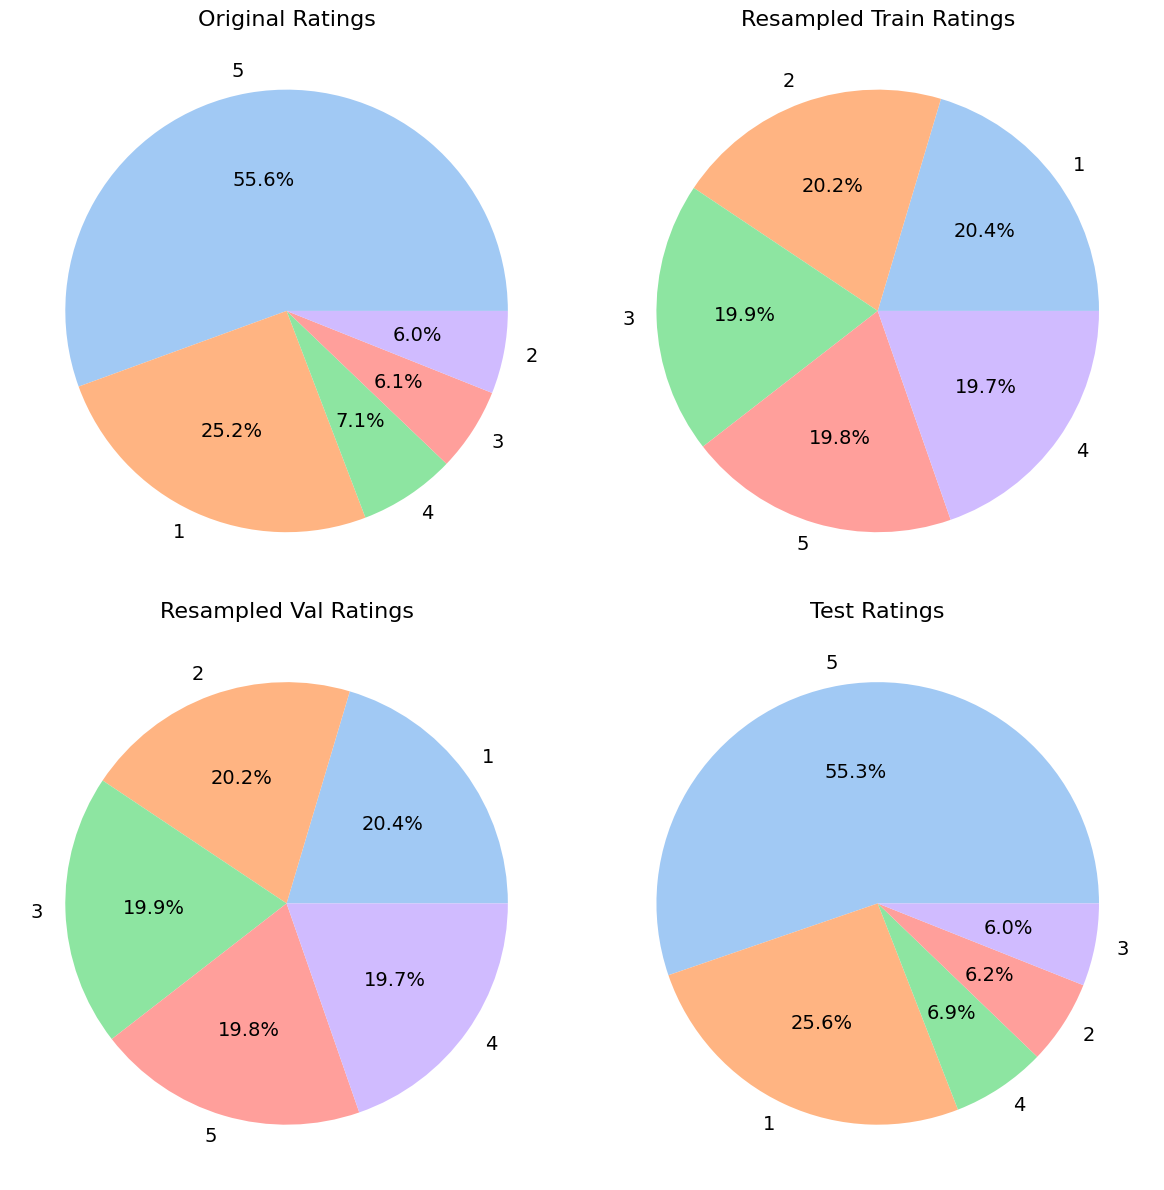

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data rating asli
count_rating_data = data['rating'].value_counts()
count_rating = count_rating_data.values
labels_rating = count_rating_data.index

# Data y_train_resample
count_rating_train = y_train_resample.value_counts()
count_rating_resample = count_rating_train.values
labels_rating_resample = count_rating_train.index

# Data y_val_resample
count_rating_val = y_val_resample.value_counts()
count_rating_val_resample = count_rating_val.values
labels_rating_val_resample = count_rating_val.index

# Data y_test
count_rating_test = y_test.value_counts()
count_rating_test_values = count_rating_test.values
labels_rating_test = count_rating_test.index

# Membuat subplot dengan 4 pie chart
fig, ax = plt.subplots(2, 2, figsize=(12, 12))  # Dua baris, dua kolom

# Warna pastel untuk pie charts
colors = sns.color_palette('pastel')

# Pie chart untuk data rating asli
ax[0, 0].pie(x=count_rating, labels=labels_rating, autopct='%1.1f%%',
             textprops={'fontsize': 14}, colors=colors)
ax[0, 0].set_title('Original Ratings', fontsize=16)

# Pie chart untuk data resampled rating (y_train_resample)
ax[0, 1].pie(x=count_rating_resample, labels=labels_rating_resample, autopct='%1.1f%%',
             textprops={'fontsize': 14}, colors=colors)
ax[0, 1].set_title('Resampled Train Ratings', fontsize=16)

# Pie chart untuk data resampled validation set (y_val_resample)
ax[1, 0].pie(x=count_rating_val_resample, labels=labels_rating_val_resample, autopct='%1.1f%%',
             textprops={'fontsize': 14}, colors=colors)
ax[1, 0].set_title('Resampled Val Ratings', fontsize=16)

# Pie chart untuk data test set (y_test)
ax[1, 1].pie(x=count_rating_test_values, labels=labels_rating_test, autopct='%1.1f%%',
             textprops={'fontsize': 14}, colors=colors)
ax[1, 1].set_title('Test Ratings', fontsize=16)

# Menampilkan grafik
plt.tight_layout()  # Agar tidak overlapping
plt.show()


Dari visualisasi pie chart di atas, ditemukan:
- Imbalance Data: Dari pie chart distribusi asli, terlihat bahwa data tidak seimbang, di mana sebagian besar rating diberikan pada nilai tertinggi (5) dan rating yang lebih rendah sangat sedikit. Ketidakseimbangan ini bisa menyebabkan bias dalam model machine learning, di mana model akan lebih cenderung memprediksi rating yang lebih sering muncul (rating 5 dalam hal ini).
- Resampling: Proses resampling dilakukan pada data train dan validasi untuk menciptakan distribusi yang lebih seimbang antar rating. Dengan cara ini, model diharapkan mampu belajar dengan lebih baik dari semua kelas (rating), tanpa mengabaikan kelas yang lebih jarang muncul.
- Data Test: Distribusi test data yang tidak di-resample tetap menunjukkan kondisi asli data untuk memastikan bahwa model diuji pada distribusi yang sebenarnya, sehingga hasil evaluasi lebih realistis dan relevan.

# **Model Building**

Pada tahap model building, data teks yang sudah diproses akan dilakukan pembentukan vektor untuk menyiapkan data teks ke dalam format yang dapat digunakan oleh model NLP.

In [31]:
## Menampilkan Top 150 Tokens (Sebelum adanya penambahan stopwords)
# text_vectorization.get_vocabulary()[:150]

CountVectorizer digunakan untuk mengubah teks menjadi representasi berbasis frekuensi kata. Proses ini dikenal sebagai bag-of-words (BOW). Setiap dokumen diubah menjadi vektor angka, di mana setiap angka menunjukkan jumlah kemunculan kata tertentu dalam dokumen.

In [30]:
# Memeriksa Vocabulary
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train_clean)
X_val_vec = Vectorize.transform(X_val_clean)
X_test_vec = Vectorize.transform(X_test_clean)
X_val_vec

<12753x10693 sparse matrix of type '<class 'numpy.int64'>'
	with 52653 stored elements in Compressed Sparse Row format>

Dari output tersebut, menunjukkan:
- Sparse Matrix menunjukkan representasi dari data teks setelah diubah menjadi vektor dengan menggunakan CountVectorizer atau metode lain seperti TF-IDF.
- Angka 12753 mengacu pada jumlah dokumen atau kalimat dalam data pelatihan.
- Angka 10693 adalah total jumlah kata unik (vocabulary) yang ditemukan dari korpus teks.
- 52653 stored elements mengindikasikan jumlah elemen non-nol dalam matriks. Sparse matrix digunakan karena mayoritas nilai dalam matriks adalah nol (kebanyakan kata tidak muncul di sebagian besar dokumen).
- Format Compressed Sparse Row (CSR) adalah teknik penyimpanan matriks secara efisien untuk menghemat memori.

In [32]:
# Mencari banyaknya vocabulary dan maksimal token pada satu document
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train_clean])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  10693
Maximum Sentence Length :  41 tokens


Hasil output di atas menunjukkan:
- Total Vocab (10693): Mengindikasikan ada 10.693 kata unik dalam keseluruhan teks yang digunakan dalam proses pelatihan.
- Maximum Sentence Length (41 tokens): Menunjukkan kalimat terpanjang dalam dataset terdiri dari 41 token (kata). Ini penting untuk menentukan batas panjang input saat melatih model.

In [33]:
# Melakukan tokenisasi pada kalimat dan menemukan kalimat dengan jumlah token terbanyak
max_token_sentence = max(X_train_clean, key=lambda sentence: len(sentence.split(" ")))

# Menemukan jumlah token pada kalimat terpanjang
max_token_count = len(max_token_sentence.split(" "))

# Mencetak kalimat dengan jumlah token terbanyak dan jumlah tokennya
print(f"Kalimat dengan jumlah token terbanyak ({max_token_count} token):\n{max_token_sentence}")


Kalimat dengan jumlah token terbanyak (41 token):
kirain ngajuin naik limit kayak mbanking belah ribet tangga ngajuin naik limit acc alasanya pandemi asn kredit lancar liat perban belah ngajuin naik limit klik upload dokumen tinggal klik proses acc situs web upload macem ktp slip gaji npwp hasil zonk


Output di atas merupakan kalimat dengan jumlah token paling banyak, yaitu 41 kata.

TextVectorization adalah proses mengubah teks mentah menjadi representasi numerik atau vektor yang dapat digunakan oleh model Machine Learning dan Deep Learning.

In [34]:
# Text Vectorization
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=2,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train_clean)

In [35]:
## Document example
print('Document example')
print(X_train_clean[11])
print('')

## Hasil dari Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([X_train_clean[11]]))
print('Vector size : ', text_vectorization([X_train_clean[11]]).shape)

Document example
lambat

Result of Text Vectorization
tf.Tensor(
[[121   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]], shape=(1, 41), dtype=int64)
Vector size :  (1, 41)


Contoh document pada index ke 11 yaitu "lambat". Setelah proses vectorizaation, kata "lambat" diubah menjadi representasi vektor seperti output diatas.
-  Angka 121 menunjukkan indeks dari kata "lambat" dalam vocabulary, sementara sisa elemen adalah 0 karena kalimat hanya terdiri dari satu kata.
- Ukuran vektor adalah (1, 41), menunjukkan bahwa panjang maksimal kalimat adalah 41 token, sehingga semua kalimat lebih pendek dipadukan (padding) hingga maksimal token.

In [36]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'bagus',
 'mudah',
 'susah',
 'masuk',
 'bantu',
 'login',
 'baik',
 'gagal',
 'transfer',
 'saldo',
 'mantap',
 'ribet',
 'verifikasi',
 'aplikasi',
 'ok',
 'bayar',
 'top',
 'buka']

Output di atas adalah beberapa contoh dari vocabulary atau kata-kata unik yang ditemukan di dataset.
- "": Representasi kosong, yang digunakan untuk padding.
- '[UNK]': Singkatan dari "Unknown", digunakan untuk kata-kata yang tidak dikenal (tidak ada dalam vocabulary).
- Kata-kata lainnya seperti 'bagus', 'mudah', 'login', 'verifikasi' adalah bagian dari kata-kata umum dalam korpus teks yang telah diubah menjadi vektor.

# **Base Model**

Base model dilakukan dengan mengatur manual dari proses embedding hingga arstitektur model.

## **Word Embedding**

Word Embedding merupakan proses mengubah kata-kata yang sudah diubah menjadi token (angka) menjadi vektor. Vektor ini kemudian akan digunakan oleh model untuk memahami makna dari kata-kata berdasarkan hubungan antar-kata.

In [37]:
# Embedding
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [38]:
## Document example
print('Document example')
print(X_train_clean[755])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([X_train_clean[755]]))
print('Vector size : ', text_vectorization([X_train_clean[755]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([X_train_clean[755]])))
print('Vector size : ', embedding(text_vectorization([X_train_clean[755]])).shape)

Document example
status hasil saldo orang transfer kena baik rugi

Result of Text Vectorization
tf.Tensor(
[[ 339   35   11  124   10  493    8  302 1154  406    1 2489 8888    1
  3560    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 41), dtype=int64)
Vector size :  (1, 41)

Result of  Embedding
tf.Tensor(
[[[-0.03995814 -0.04914847  0.00530278 ... -0.0310184   0.00613932
   -0.0026413 ]
  [ 0.01288925  0.02102018 -0.04449735 ... -0.04351489 -0.02562095
    0.03906038]
  [-0.0314037   0.04376436 -0.0109522  ...  0.02323575 -0.04302099
    0.02448804]
  ...
  [-0.04017478  0.01602474 -0.01477314 ... -0.00022473 -0.01652235
    0.02226642]
  [-0.04017478  0.01602474 -0.01477314 ... -0.00022473 -0.01652235
    0.02226642]
  [-0.04017478  0.01602474 -0.01477314 ... -0.00022473 -0.01652235
    0.02226642]]], shape=(1, 41, 128), dtype=float32)
Vector size :  (1, 41, 128)


Hasil Embedding dari output diatas, yaitu:
- Setiap token numerik (angka yang merepresentasikan kata) diubah menjadi vektor berdimensi 128.
- Sebagai contoh, token 339 diubah menjadi vektor dengan 128 nilai, seperti [0.02140203, -0.00554774, 0.03080011, ...].
- Vektor ini adalah representasi semantik dari kata yang bersesuaian, yang membantu model memahami hubungan antar kata berdasarkan konteks.
- Dimensi (1, 41, 128):
  - 1 menunjukkan satu dokumen atau satu kalimat.
  - 41 menunjukkan panjang kalimat yang sudah dipadati hingga 41 token.
  - 128 menunjukkan bahwa setiap token sekarang direpresentasikan sebagai vektor dengan 128 dimensi (embedding vector).

## **LSTM**

In [51]:
# Model Training using LSTM
%%time

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create ReduceLROnPlateau callback
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-4)

## Clear Session
seed = 32
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
# model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_1.add(Dropout(0.2, seed=seed))
model_lstm_1.add(Bidirectional(LSTM(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.2, seed=seed))
# model_lstm_1.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_1.add(Dropout(0.2, seed=seed))
# model_lstm_1.add(Dense(8, activation='relu'))
# model_lstm_1.add(Dropout(0.2, seed=seed))
model_lstm_1.add(Dense(5, activation='softmax',
                       kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                       kernel_regularizer=tf.keras.regularizers.l2(0.005)))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_1_hist = model_lstm_1.fit(X_train_clean, y_train_ohe,
                                     epochs=20,
                                     validation_data=(X_val_clean, y_val_ohe),
                                     callbacks=[reduce_lr_cb])

Epoch 1/20
929/929 [==============================] - 37s 36ms/step - loss: 1.3524 - accuracy: 0.3838 - val_loss: 1.2943 - val_accuracy: 0.4132 - lr: 0.0010
Epoch 2/20
929/929 [==============================] - 14s 15ms/step - loss: 1.2362 - accuracy: 0.4475 - val_loss: 1.2935 - val_accuracy: 0.4116 - lr: 0.0010
Epoch 3/20
929/929 [==============================] - 13s 14ms/step - loss: 1.1626 - accuracy: 0.4935 - val_loss: 1.3426 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 4/20
929/929 [==============================] - 13s 14ms/step - loss: 1.0954 - accuracy: 0.5325 - val_loss: 1.3877 - val_accuracy: 0.3990 - lr: 0.0010
Epoch 5/20
929/929 [==============================] - 14s 15ms/step - loss: 1.0196 - accuracy: 0.5765 - val_loss: 1.4565 - val_accuracy: 0.3961 - lr: 0.0010
Epoch 6/20
929/929 [==============================] - 13s 14ms/step - loss: 0.8956 - accuracy: 0.6434 - val_loss: 1.5835 - val_accuracy: 0.3896 - lr: 1.0000e-04
Epoch 7/20
929/929 [==============================] - 

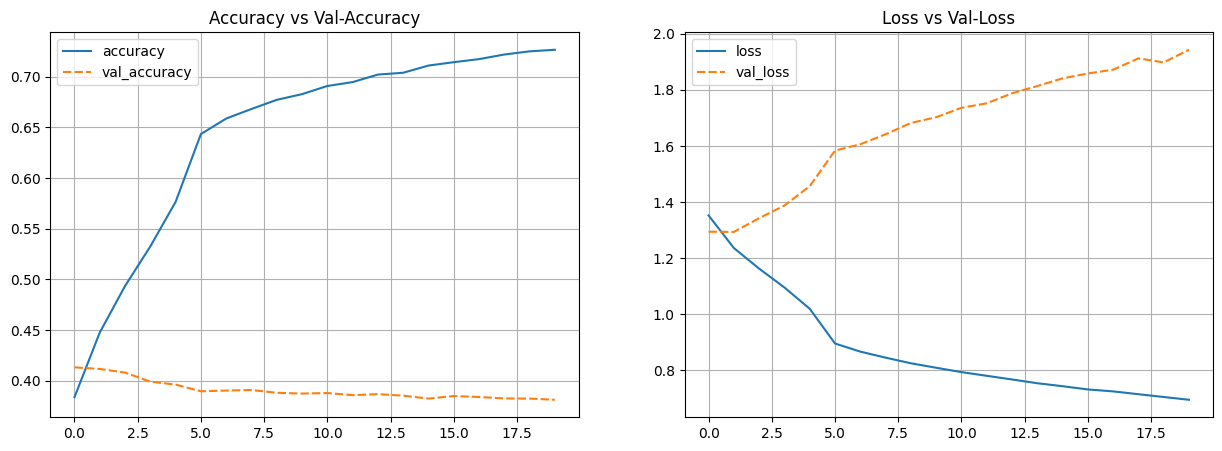

In [52]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

- Accuracy vs Val-Accuracy:

Accuracy (garis biru): Akurasi pada data pelatihan terus meningkat seiring dengan bertambahnya jumlah epoch, mendekati nilai sekitar 0.70 (atau 70%).
Validation Accuracy (garis oranye): Akurasi pada data validasi relatif datar dan berada di sekitar 0.40 (atau 40%) sejak epoch ke-5, dan tidak menunjukkan peningkatan yang signifikan.

- Loss vs Val-Loss:

Loss (garis biru): Nilai loss pada data pelatihan menurun secara konsisten, menunjukkan bahwa model semakin baik dalam memprediksi pada data pelatihan.
Validation Loss (garis oranye): Sebaliknya, nilai loss pada data validasi meningkat setelah epoch ke-5, yang menunjukkan overfitting. Artinya, meskipun model menjadi lebih baik pada data pelatihan, performanya menurun pada data yang tidak terlihat sebelumnya (validasi).

In [53]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Lakukan prediksi pada data val
y_pred_prob = model_lstm_1.predict(X_val_clean)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas (ambil kelas dengan probabilitas tertinggi)

# 2. Konversi ground truth dari one-hot encoding menjadi label kelas
y_val_labels = np.argmax(y_val_ohe, axis=1)

# 3. Buat classification report
report = classification_report(y_val_labels, y_pred, target_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'])

# 4. Cetak classification report
print(report)


399/399 [==============================] - 6s 10ms/step
              precision    recall  f1-score   support

     Class_1       0.41      0.41      0.41      2600
     Class_2       0.31      0.33      0.32      2581
     Class_3       0.29      0.24      0.26      2535
     Class_4       0.29      0.21      0.24      2509
     Class_5       0.51      0.71      0.59      2528

    accuracy                           0.38     12753
   macro avg       0.36      0.38      0.37     12753
weighted avg       0.36      0.38      0.37     12753



In [54]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Lakukan prediksi pada data test
y_pred_prob = model_lstm_1.predict(X_test_clean)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas (ambil kelas dengan probabilitas tertinggi)

# 2. Konversi ground truth dari one-hot encoding menjadi label kelas
y_test_labels = np.argmax(y_test_ohe, axis=1)

# 3. Buat classification report
report = classification_report(y_test_labels, y_pred, target_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'])

# 4. Cetak classification report
print(report)


231/231 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

     Class_1       0.69      0.40      0.50      1894
     Class_2       0.14      0.32      0.19       455
     Class_3       0.13      0.24      0.17       445
     Class_4       0.10      0.21      0.14       510
     Class_5       0.88      0.73      0.80      4081

    accuracy                           0.55      7385
   macro avg       0.39      0.38      0.36      7385
weighted avg       0.69      0.55      0.60      7385



929/929 [==============================] - 5s 6ms/step


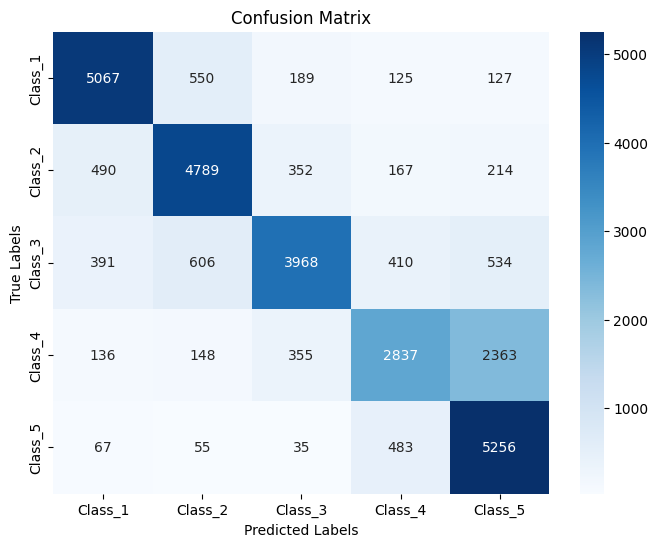

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Lakukan prediksi pada data train
y_pred_prob = model_lstm_1.predict(X_train_clean)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas

# 2. Konversi ground truth dari one-hot encoding menjadi label kelas
y_train_labels = np.argmax(y_train_ohe, axis=1)

# 3. Buat confusion matrix
cm = confusion_matrix(y_train_labels, y_pred)

# 4. Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
            yticklabels=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **Improve Model**

In [39]:
# Download the Embedding Layer

url = 'https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [41]:
%%time

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model Training using LSTM with Transfer Learning

# Create ReduceLROnPlateau callback
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

## Clear Session
seed = 32
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.2, seed=seed))
model_lstm_2.add(Bidirectional(LSTM(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.2, seed=seed))

model_lstm_2.add(Dense(5, activation='softmax',
                       kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                       kernel_regularizer=tf.keras.regularizers.l2(0.01)))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

model_lstm_2_hist = model_lstm_2.fit(X_train_clean, y_train_ohe,
                                     epochs=25, validation_data=(X_val_clean, y_val_ohe),
                                     callbacks=[reduce_lr_cb])

Epoch 1/25
929/929 [==============================] - 38s 33ms/step - loss: 1.5504 - accuracy: 0.2904 - val_loss: 1.5059 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 2/25
929/929 [==============================] - 29s 31ms/step - loss: 1.5123 - accuracy: 0.3027 - val_loss: 1.5642 - val_accuracy: 0.2828 - lr: 0.0010
Epoch 3/25
929/929 [==============================] - 30s 33ms/step - loss: 1.4861 - accuracy: 0.3172 - val_loss: 1.4798 - val_accuracy: 0.3169 - lr: 0.0010
Epoch 4/25
929/929 [==============================] - 29s 32ms/step - loss: 1.4593 - accuracy: 0.3278 - val_loss: 1.4513 - val_accuracy: 0.3322 - lr: 0.0010
Epoch 5/25
929/929 [==============================] - 30s 32ms/step - loss: 1.4449 - accuracy: 0.3352 - val_loss: 1.4363 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/25
929/929 [==============================] - 29s 31ms/step - loss: 1.4335 - accuracy: 0.3397 - val_loss: 1.4248 - val_accuracy: 0.3474 - lr: 0.0010
Epoch 7/25
929/929 [==============================] - 31s 

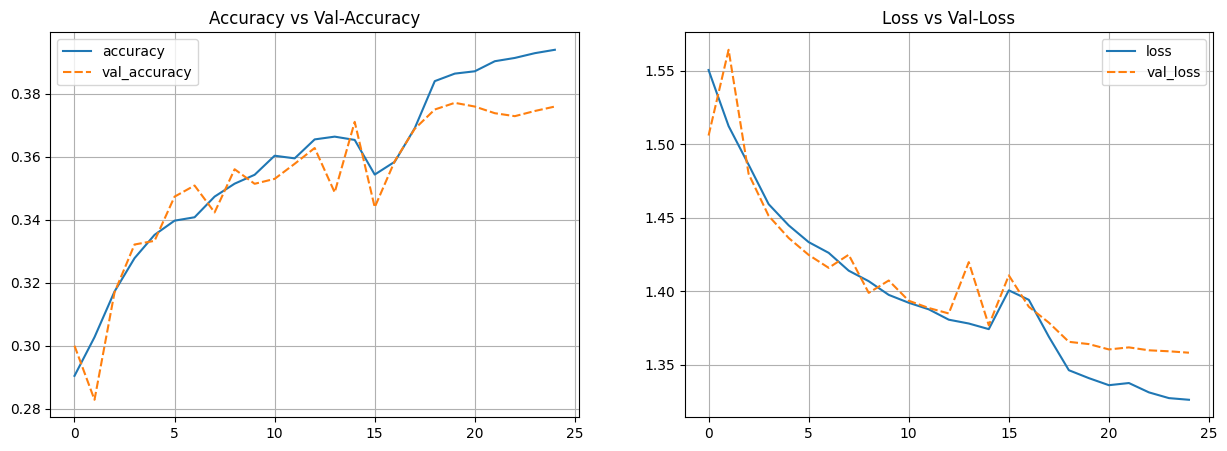

In [44]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

- Accuracy vs Val-Accuracy:

Accuracy (garis biru): Pada model ini, akurasi pada data pelatihan meningkat lebih lambat dibanding model pertama, tetapi ada beberapa titik di mana akurasi validasi (garis oranye) lebih tinggi daripada akurasi pelatihan.
Validation Accuracy (garis oranye): Akurasi validasi lebih fluktuatif, tetapi di sekitar epoch ke-15, validasi akurasi mendekati nilai akurasi pelatihan, yang mengindikasikan generalisasi yang lebih baik dibanding model pertama.

- Loss vs Val-Loss:

Loss (garis biru): Nilai loss pada data pelatihan terus menurun, yang menunjukkan bahwa model terus belajar.
Validation Loss (garis oranye): Fluktuasi pada loss validasi menunjukkan model mengalami underfitting di beberapa tahap awal, tetapi mendekati nilai yang serupa dengan loss pelatihan di epoch akhir.

In [47]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Lakukan prediksi pada data val
y_pred_prob = model_lstm_2.predict(X_val_clean)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas (ambil kelas dengan probabilitas tertinggi)

# 2. Konversi ground truth dari one-hot encoding menjadi label kelas
y_val_labels = np.argmax(y_val_ohe, axis=1)

# 3. Buat classification report
report = classification_report(y_val_labels, y_pred, target_names=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'])

# 4. Cetak classification report
print(report)


399/399 [==============================] - 7s 17ms/step
              precision    recall  f1-score   support

    Rating_1       0.37      0.50      0.42      2600
    Rating_2       0.31      0.33      0.32      2581
    Rating_3       0.26      0.18      0.22      2535
    Rating_4       0.29      0.09      0.14      2509
    Rating_5       0.50      0.77      0.61      2528

    accuracy                           0.38     12753
   macro avg       0.35      0.38      0.34     12753
weighted avg       0.35      0.38      0.34     12753



In [49]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Lakukan prediksi pada data test
y_pred_prob = model_lstm_2.predict(X_test_clean)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas (ambil kelas dengan probabilitas tertinggi)

# 2. Konversi ground truth dari one-hot encoding menjadi label kelas
y_test_labels = np.argmax(y_test_ohe, axis=1)

# 3. Buat classification report
report = classification_report(y_test_labels, y_pred, target_names=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'])

# 4. Cetak classification report
print(report)


231/231 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

    Rating_1       0.63      0.48      0.54      1894
    Rating_2       0.13      0.30      0.18       455
    Rating_3       0.10      0.18      0.13       445
    Rating_4       0.12      0.11      0.12       510
    Rating_5       0.87      0.76      0.81      4081

    accuracy                           0.58      7385
   macro avg       0.37      0.37      0.36      7385
weighted avg       0.66      0.58      0.62      7385



929/929 [==============================] - 11s 12ms/step


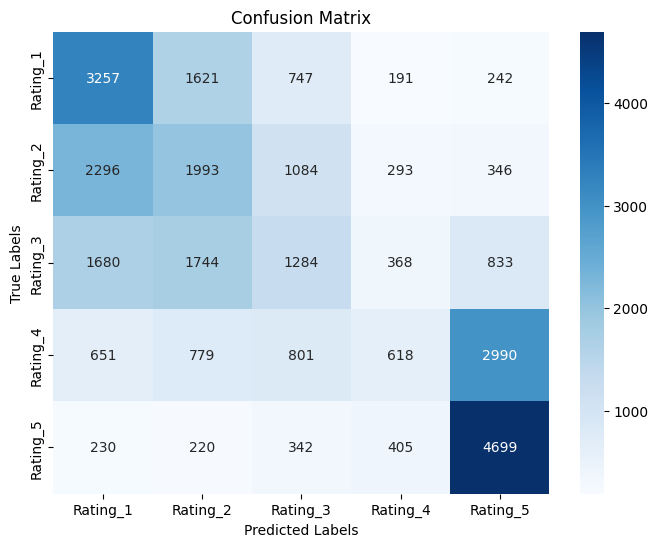

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Lakukan prediksi pada data train
y_pred_prob = model_lstm_2.predict(X_train_clean)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas

# 2. Konversi ground truth dari one-hot encoding menjadi label kelas
y_train_labels = np.argmax(y_train_ohe, axis=1)

# 3. Buat confusion matrix
cm = confusion_matrix(y_train_labels, y_pred)

# 4. Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'],
            yticklabels=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## **Improve Model Gajadi**

In [ ]:
# # Mount Google Drive into Google Colab

# from google.colab import drive
# drive.mount('/content/gdrive')

# # Change Directory to `My Drive`
# %cd /content/gdrive/My Drive/

# # Check Contents of Current Directory
# !ls

# # Change Current Directory into `word2vec_wikipedia_id`
# %cd word2vec_wikipedia_id/

# # Check Contents of Current Directory
# !ls

# # Load Model
# model = Word2Vec.load("word2vec_wikipedia_id.model")

# import numpy as np

# # Vocabulary size dan embedding dimension
# vocab_size = len(model.wv.key_to_index)  # Ukuran dari vocabulary (jumlah kata unik)
# embedding_dim = model.wv.vector_size     # Dimensi dari vektor Word2Vec

# # Membuat embedding matrix, di mana setiap indeks berisi embedding dari word2vec
# embedding_matrix = np.zeros((vocab_size, embedding_dim))

# # Mengisi embedding_matrix dengan vektor dari Word2Vec
# for word, index in model.wv.key_to_index.items():
#     embedding_matrix[index] = model.wv[word]

In [ ]:
# %%time

# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Model Training using LSTM with Transfer Learning

# # Create ReduceLROnPlateau callback
# reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-4)

# ## Clear Session
# seed = 32
# tf.keras.backend.clear_session()
# np.random.seed(seed)
# tf.random.set_seed(seed)

# ## Define the architecture
# model_lstm_2 = Sequential()
# # Add embedding layer with Word2Vec weights
# # embedding_layer = Embedding(input_dim=vocab_size,
# #                             output_dim=embedding_dim,
# #                             weights=[embedding_matrix],  # Pre-trained Word2Vec weights
# #                             input_length=max_sen_len,  # Panjang maksimal setiap sequence input
# #                             trainable=False)  # Set to False to freeze the pre-trained embeddings

# # model_lstm_2.add(embedding_layer)
# model_lstm_2.add(hub_layer)
# model_lstm_2.add(Reshape((128, 1)))
# model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_2.add(Dropout(0.2, seed=seed))
# model_lstm_2.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_2.add(Dropout(0.2, seed=seed))
# # model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# # model_lstm_2.add(Dropout(0.2, seed=seed))
# # model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# # model_lstm_2.add(Dropout(0.2, seed=seed))
# # model_lstm_2.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed),
# #                        kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# # model_lstm_2.add(Dropout(0.2, seed=seed))
# model_lstm_2.add(Dense(5, activation='softmax',
#                        kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
#                       #  kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# model_lstm_2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

# model_lstm_2_hist = model_lstm_2.fit(X_train_clean, y_train_ohe,
#                                      epochs=20, validation_data=(X_val_clean, y_val_ohe),
#                                      callbacks=[reduce_lr_cb])

In [ ]:
# %%time

# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Model Training using LSTM with Transfer Learning

# # Create ReduceLROnPlateau callback
# reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

# ## Clear Session
# seed = 32
# tf.keras.backend.clear_session()
# np.random.seed(seed)
# tf.random.set_seed(seed)

# ## Define the architecture
# model_lstm_2 = Sequential()
# # Add embedding layer with Word2Vec weights
# # embedding_layer = Embedding(input_dim=vocab_size,
# #                             output_dim=embedding_dim,
# #                             weights=[embedding_matrix],  # Pre-trained Word2Vec weights
# #                             input_length=max_sen_len,  # Panjang maksimal setiap sequence input
# #                             trainable=False)  # Set to False to freeze the pre-trained embeddings

# # model_lstm_2.add(embedding_layer)
# model_lstm_2.add(hub_layer)
# model_lstm_2.add(Reshape((128, 1)))
# model_lstm_2.add(Bidirectional(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_2.add(Dropout(0.2, seed=seed))
# model_lstm_2.add(Bidirectional(LSTM(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_2.add(Dropout(0.2, seed=seed))
# # model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# # model_lstm_2.add(Dropout(0.2, seed=seed))
# # model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# # model_lstm_2.add(Dropout(0.2, seed=seed))
# # model_lstm_2.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed),
# #                        kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# # model_lstm_2.add(Dropout(0.2, seed=seed))
# model_lstm_2.add(Dense(5, activation='softmax',
#                        kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
#                        kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# model_lstm_2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

# model_lstm_2_hist = model_lstm_2.fit(X_train_clean, y_train_ohe,
#                                      epochs=45, validation_data=(X_test_clean, y_test_ohe),
#                                      callbacks=[reduce_lr_cb])

In [ ]:
# %%time

# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Model Training using LSTM with Transfer Learning
# # Create ReduceLROnPlateau callback
# reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-4)

# ## Clear Session
# seed = 32
# tf.keras.backend.clear_session()
# np.random.seed(seed)
# tf.random.set_seed(seed)

# ## Define the architecture
# model_lstm_2 = Sequential()

# # Add embedding layer with hub_layer
# model_lstm_2.add(hub_layer)
# model_lstm_2.add(Reshape((128, 1)))
# model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_2.add(Dropout(0.2, seed=seed))
# model_lstm_2.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# model_lstm_2.add(Dropout(0.2, seed=seed))

# model_lstm_2.add(Dense(5, activation='softmax',
#                        kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))

# model_lstm_2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

# model_lstm_2_hist = model_lstm_2.fit(X_train_clean, y_train_ohe,
#                                      epochs=20, validation_data=(X_val_clean, y_val_ohe),
#                                      callbacks=[reduce_lr_cb])

Epoch 1/20
929/929 [==============================] - 209s 212ms/step - loss: 1.5446 - accuracy: 0.2825 - val_loss: 1.5227 - val_accuracy: 0.2946 - lr: 0.0010
Epoch 2/20
929/929 [==============================] - 179s 193ms/step - loss: 1.5077 - accuracy: 0.3040 - val_loss: 1.5001 - val_accuracy: 0.3078 - lr: 0.0010
Epoch 3/20
929/929 [==============================] - 170s 183ms/step - loss: 1.4886 - accuracy: 0.3176 - val_loss: 1.5007 - val_accuracy: 0.3118 - lr: 0.0010
Epoch 4/20
929/929 [==============================] - 167s 180ms/step - loss: 1.4792 - accuracy: 0.3179 - val_loss: 1.4622 - val_accuracy: 0.3238 - lr: 0.0010
Epoch 5/20
929/929 [==============================] - 177s 190ms/step - loss: 1.4640 - accuracy: 0.3235 - val_loss: 1.4787 - val_accuracy: 0.3239 - lr: 0.0010
Epoch 6/20
929/929 [==============================] - 175s 188ms/step - loss: 1.4547 - accuracy: 0.3283 - val_loss: 1.4443 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 7/20
929/929 [==========================

In [ ]:
# from sklearn.metrics import classification_report
# import numpy as np

# # 1. Lakukan prediksi pada data test
# y_pred_prob = model_lstm_2.predict(X_test_clean)  # Prediksi probabilitas
# y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas (ambil kelas dengan probabilitas tertinggi)

# # 2. Konversi ground truth dari one-hot encoding menjadi label kelas
# y_test_labels = np.argmax(y_test_ohe, axis=1)

# # 3. Buat classification report
# report = classification_report(y_test_labels, y_pred, target_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'])

# # 4. Cetak classification report
# print(report)


399/399 [==============================] - 5s 12ms/step
              precision    recall  f1-score   support

     Class_1       0.34      0.64      0.45      2600
     Class_2       0.29      0.22      0.25      2581
     Class_3       0.27      0.09      0.14      2535
     Class_4       0.26      0.10      0.15      2509
     Class_5       0.49      0.78      0.60      2528

    accuracy                           0.37     12753
   macro avg       0.33      0.37      0.32     12753
weighted avg       0.33      0.37      0.32     12753



399/399 [==============================] - 6s 16ms/step


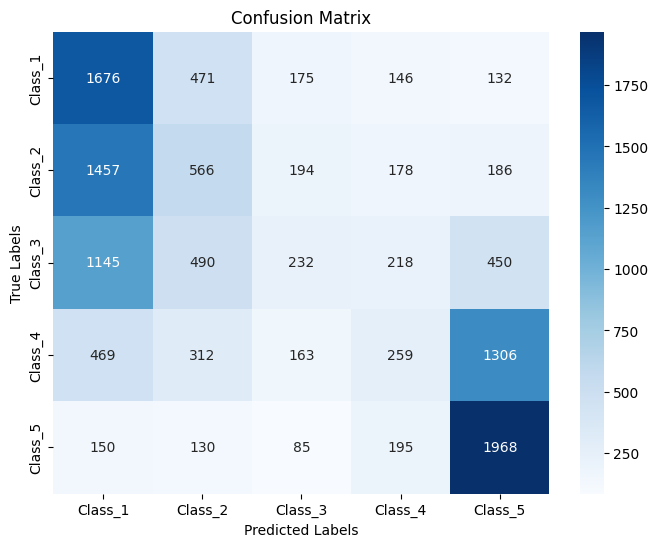

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # 1. Lakukan prediksi pada data train
# y_pred_prob = model_lstm_2.predict(X_train_clean)  # Prediksi probabilitas
# y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi probabilitas ke label kelas

# # 2. Konversi ground truth dari one-hot encoding menjadi label kelas
# y_train_labels = np.argmax(y_train_ohe, axis=1)

# # 3. Buat confusion matrix
# cm = confusion_matrix(y_train_labels, y_pred)

# # 4. Visualisasikan confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
#             yticklabels=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()


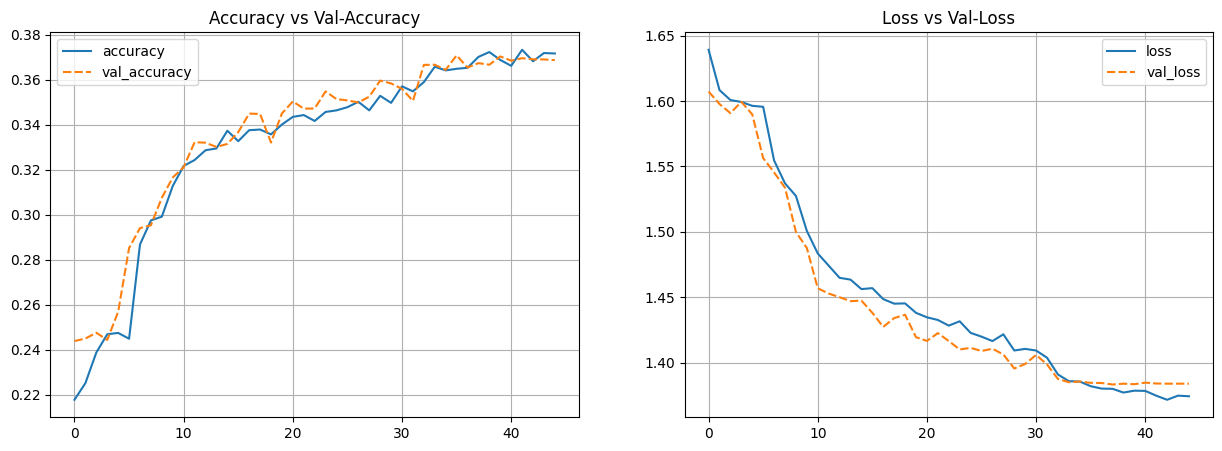

In [ ]:
# # Plot Training Results

# model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

# plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
# sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
# plt.grid()
# plt.title('Accuracy vs Val-Accuracy')

# plt.subplot(1, 2, 2)
# sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
# plt.grid()
# plt.title('Loss vs Val-Loss')
# plt.show()

# **Kesimpulan**

- Model pertama (base model) mengalami overfitting karena perbedaan besar antara akurasi/loss pada pelatihan dan validasi. Artinya, model belajar terlalu spesifik pada data pelatihan dan tidak mampu generalisasi dengan baik pada data baru.
- Model kedua (improve model) lebih seimbang antara akurasi dan loss pada pelatihan dan validasi, meskipun masih menunjukkan beberapa fluktuasi. Model ini lebih mungkin untuk memberikan hasil yang lebih baik pada data yang tidak terlihat sebelumnya.
- Oleh karena itu pemilihan model untuk data inference menggunakan improve model.
- Dari hasil analisis yang dilakukan, masalah utama seperti kesulitan login, error, dan masalah teknis pada fitur aplikasi harus menjadi prioritas untuk ditangani. Di sisi lain, pengalaman positif pada pengguna dengan rating tinggi harus tetap dipertahankan dan ditingkatkan dengan fitur-fitur inovatif, kemudahan penggunaan, serta program loyalitas yang memberikan insentif bagi pengguna yang puas.


# **Rekomendasi**

Berdasarkan analisis yang telah dilakukan, berikut adalah beberapa rekomendasi bisnis untuk meningkatkan pengalaman pelanggan dan meningkatkan kepuasan pengguna:

1. **Optimasi Proses Login**
  - **Masalah yang Ditemukan**: Kata-kata seperti "masuk", "susah", "gagal", dan "login" muncul dominan pada rating rendah (1 dan 2), menunjukkan bahwa banyak pengguna mengalami masalah saat login.
  - **Rekomendasi**:
    - Perbaiki sistem login untuk memastikan pengalaman yang lebih lancar, seperti mempercepat waktu loading atau menambah opsi login alternatif (misalnya, menggunakan biometrik seperti sidik jari atau pengenalan wajah).
    - Sediakan panduan troubleshooting yang jelas dan customer support yang cepat untuk membantu pengguna jika mengalami masalah saat login.

2. **Perbaikan Fitur Aplikasi**
  - **Masalah yang Ditemukan**: Kata-kata seperti "error", "gagal", dan "susah" sering muncul, yang menandakan adanya masalah teknis pada aplikasi, khususnya dalam fitur-fitur penting seperti transfer, saldo, dan verifikasi.
  - **Rekomendasi**:
    - Lakukan uji coba mendalam untuk mengidentifikasi dan memperbaiki bug atau masalah teknis yang menyebabkan error.
    - Meningkatkan stabilitas aplikasi, terutama untuk fitur penting seperti transfer uang dan pengecekan saldo.
    - Implementasi fitur pelaporan masalah langsung dari aplikasi, sehingga pengguna dapat melaporkan bug atau masalah dengan mudah.

3. **Pengembangan Fitur yang Mudah**
  - **Apa yang Diapresiasi Pengguna**: Pada rating tinggi (4 dan 5), kata-kata seperti "mudah", "bagus", "fitur", dan "mantap" sering muncul. Ini menunjukkan bahwa pengguna mengapresiasi aplikasi yang memiliki fitur mudah digunakan dan bermanfaat.
  - **Rekomendasi**:
    - Terus kembangkan fitur yang ramah pengguna.
    - Lakukan survei kepada pengguna untuk memahami fitur-fitur mana yang paling mereka sukai dan fitur baru apa yang mereka inginkan.

4. **Meningkatkan Komunikasi dan Customer Support**
  - **Masalah yang Ditemukan**: Pengguna yang memberikan rating rendah sering mengeluhkan masalah seperti "error", "gagal", dan "kecewa".
  - **Rekomendasi**:
    - Tingkatkan customer support dengan respons yang lebih cepat, baik melalui live chat atau chatbot yang dapat menjawab pertanyaan umum dengan cepat.
    - Sediakan saluran komunikasi yang mudah diakses untuk menangani keluhan pengguna, seperti integrasi customer service di dalam aplikasi.
    - Buat tutorial atau panduan langkah demi langkah di dalam aplikasi untuk membantu pengguna dalam menggunakan fitur-fitur penting.

5. **Peningkatan Versi dan Kompatibilitas Aplikasi**
  - **Masalah yang Ditemukan**: Pengguna juga menyebutkan masalah terkait "versi" dan "update".
  - **Rekomendasi**:
    - Pastikan aplikasi terus di-update secara berkala, mengatasi masalah kompatibilitas pada perangkat yang lebih lama, dan menyediakan fitur-fitur baru yang mempermudah pengguna.
    - Lakukan sosialisasi yang jelas dan transparan terkait update atau perubahan besar pada aplikasi untuk mengurangi kebingungan pengguna.

6. **Fokus pada Kemudahan Transaksi**
  - **Apa yang Diapresiasi Pengguna**: Pada rating yang lebih tinggi, kata-kata seperti "transfer", "fitur", dan "lancar" menonjol, yang menunjukkan kepuasan terhadap fitur transaksi.
  - **Rekomendasi**:
    - Tingkatkan pengalaman pengguna dalam hal transaksi finansial, seperti mempercepat proses transfer dan mengurangi potensi gangguan atau error.
    - Perbaiki dan buat fitur transfer lebih efisien, misalnya dengan sekali klik atau otomatisasi pembayaran rutin.



# **Model Saving**

In [56]:
# Menyimpan data inference ke csv
X_inference.to_csv('X_inf.csv', index=False)
y_inference.to_csv('y_inf.csv', index=False)


# Memuat model
from tensorflow.keras.models import load_model
import tensorflow_hub as hub

# Menyimpan model dalam format HDF5

# Menyimpan model
model_lstm_2.save('model_lstm_2.keras')



# **Model Inference & Deployment**

- Notebook : P2G7_Inf_Intan.ipynb
- Huggingface :